In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from folium import Choropleth
sns.set()
pd.set_option('display.max_columns', None)

# 导入文件

三份文件

1.listings_summary 19  19年房源list

2.listings_summary 20  20年房源list

3.reviews 评论数据

In [2]:
listings19=pd.read_csv('data/listings_summary 19.csv')
listings19['last_review']=pd.to_datetime(listings19['last_review'])#转化为时间变量 便于可视化 下同
listings19=listings19.sort_values(by='last_review')#房源list
listings19.head()

id                                               name  host_id  \
23    41870                      Room in relaxed family house!   182993   
242  241133                     Double bedroom in North London   542769   
143  109299  Trendy Dalston 2BR/2BA En-Suite/Balcony/Gym/Train   261091   
545  388306                                Garden flat, Putney  1942893   
360  306405                Spacious Double Room in East London  1575800   

    host_name  neighbourhood_group         neighbourhood  latitude  longitude  \
23      Bimpe                  NaN        Waltham Forest  51.55842    0.00382   
242      Dean                  NaN                Barnet  51.60552   -0.14845   
143      Nina                  NaN               Hackney  51.54599   -0.07426   
545     Nigel                  NaN            Wandsworth  51.46107   -0.21945   
360      Mary                  NaN  Barking and Dagenham  51.54259    0.15386   

           room_type  price  minimum_nights  number_of_reviews last_review  \
23      Private room     35               2                  2  2011-07-02   
242     Private room     45             120                  1  2011-10-21   
143  Entire home/apt    135              14                  3  2011-11-22   
545     Private room     25               1                  1  2012-03-26   
360     Private room     41               4                  3  2012-05-27   

     reviews_per_month  calculated_host_listings_count  availability_365  
23                0.02                               1                 0  
242               0.01                               1               315  
143               0.03                               3               362  
545               0.01                               1                 0  
360               0.03                               1               365

In [3]:
listings20=pd.read_csv('data/listings_summary 20.csv')
listings20['last_review']=pd.to_datetime(listings20['last_review'])
listings20=listings20.sort_values(by='last_review')#房源list
listings20.head()

id                                               name  host_id  \
22    41870                      Room in relaxed family house!   182993   
214  241133                     Double bedroom in North London   542769   
132  109299  Trendy Dalston 2BR/2BA En-Suite/Balcony/Gym/Train   261091   
470  388306                                Garden flat, Putney  1942893   
311  306405                Spacious Double Room in East London  1575800   

    host_name  neighbourhood_group         neighbourhood  latitude  longitude  \
22      Bimpe                  NaN        Waltham Forest  51.55842    0.00382   
214      Dean                  NaN                Barnet  51.60552   -0.14845   
132      Nina                  NaN               Hackney  51.54599   -0.07426   
470     Nigel                  NaN            Wandsworth  51.46107   -0.21945   
311      Mary                  NaN  Barking and Dagenham  51.54259    0.15386   

           room_type  price  minimum_nights  number_of_reviews last_review  \
22      Private room     37               2                  2  2011-07-02   
214     Private room     33             120                  1  2011-10-21   
132  Entire home/apt    135              14                  3  2011-11-22   
470     Private room    908               1                  1  2012-03-26   
311     Private room     41               4                  3  2012-05-27   

     reviews_per_month  calculated_host_listings_count  availability_365  
22                0.02                               1                 0  
214               0.01                               2               365  
132               0.03                               3               364  
470               0.01                               1                47  
311               0.03                               1               365

In [4]:
reviews=pd.read_csv('data/reviews.csv')
reviews['date']=pd.to_datetime(reviews['date'])
reviews.head()

listing_id     id       date  reviewer_id  reviewer_name  \
0       11551  30672 2010-03-21        93896       Shar-Lyn   
1       11551  32236 2010-03-29        97890           Zane   
2       11551  41044 2010-05-09       104133          Chase   
3       11551  48926 2010-06-01       122714  John & Sylvia   
4       11551  58352 2010-06-28       111543        Monique   

                                            comments  
0  The flat was bright, comfortable and clean and...  
1  We stayed with Adriano and Valerio for a week ...  
2  Adriano was a fantastic host. We felt very at ...  
3  We had a most wonderful stay with Adriano and ...  
4    I'm not sure which of us misunderstood the s...

# 数据探索

In [5]:
#清洗前维度
print('listings19:',listings19.shape)
print('listings20:',listings20.shape)
print('reviews:',reviews.shape)

listings19: (86469, 16)
listings20: (77136, 16)
reviews: (1178933, 6)


In [6]:
listings19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86469 entries, 23 to 86468
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              86469 non-null  int64         
 1   name                            86444 non-null  object        
 2   host_id                         86469 non-null  int64         
 3   host_name                       84822 non-null  object        
 4   neighbourhood_group             0 non-null      float64       
 5   neighbourhood                   86469 non-null  object        
 6   latitude                        86469 non-null  float64       
 7   longitude                       86469 non-null  float64       
 8   room_type                       86469 non-null  object        
 9   price                           86469 non-null  int64         
 10  minimum_nights                  86469 non-null  int64         
 11  n

In [7]:
listings20.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77136 entries, 22 to 77135
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              77136 non-null  int64         
 1   name                            77112 non-null  object        
 2   host_id                         77136 non-null  int64         
 3   host_name                       77095 non-null  object        
 4   neighbourhood_group             0 non-null      float64       
 5   neighbourhood                   77136 non-null  object        
 6   latitude                        77136 non-null  float64       
 7   longitude                       77136 non-null  float64       
 8   room_type                       77136 non-null  object        
 9   price                           77136 non-null  int64         
 10  minimum_nights                  77136 non-null  int64         
 11  n

In [8]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1178933 entries, 0 to 1178932
Data columns (total 6 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   listing_id     1178933 non-null  int64         
 1   id             1178933 non-null  int64         
 2   date           1178933 non-null  datetime64[ns]
 3   reviewer_id    1178933 non-null  int64         
 4   reviewer_name  1178932 non-null  object        
 5   comments       1178412 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 54.0+ MB


# 可视化 

从房源数上来看

2020 2019房源数对比

<BarContainer object of 1 artists>

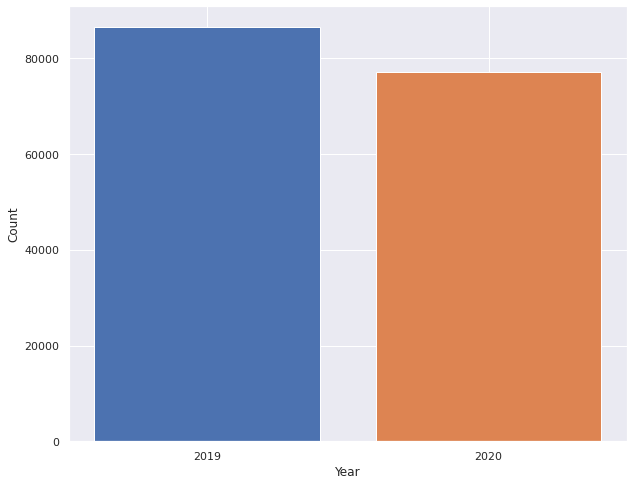

In [9]:
plt.figure(figsize=(10,8))
#plt.title('')
plt.xlabel('Year')
plt.ylabel('Count')
plt.bar('2019',listings19.shape[0])
plt.bar('2020',listings20.shape[0])

 长租短租的影响
 
 定义 minimum_nights > 7 天即为长租

分别利用饼图 画占比

In [10]:
d1=pd.value_counts(np.where(listings19['minimum_nights']>7,'long term','short term'))

In [11]:
d2=pd.value_counts(np.where(listings20['minimum_nights']>7,'long term','short term'))

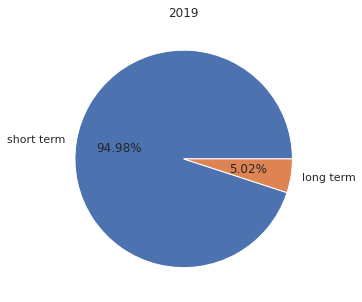

In [12]:
labels1=d1.index
X1=d1.values

plt.figure(figsize=(5,5))
plt.pie(X1,labels=labels1,autopct='%1.2f%%') 
plt.title("2019")
plt.show()  

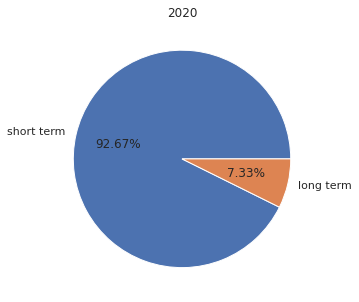

In [13]:
labels2=d2.index
X2=d2.values

plt.figure(figsize=(5,5))
plt.pie(X2,labels=labels2,autopct='%1.2f%%') 
plt.title("2020")
plt.show()  

房价街区变化

按neighbourhood平均 得到每个neighbourhood的平均价格

利用folium绘制地图

neighbourhoods.geojson中有街区范围

通过在地图上标记不同颜色的街区以表示不同街区平均房价的不同

2019

In [14]:
nb_listings = listings19.groupby('neighbourhood').mean().loc[:,'price'].sort_values()

boroughs = gpd.read_file('data/neighbourhoods.geojson')
boroughs = boroughs[['neighbourhood', 'geometry']].set_index('neighbourhood')

f = folium.Figure(width=1000, height=700)
m_1 = folium.Map(tiles='openstreetmap').add_to(f)
m_1.fit_bounds([[51.697855, -0.519505], [51.276832, 0.353619]])

Choropleth(geo_data=boroughs.__geo_interface__, 
           data=nb_listings, 
           key_on="feature.id", 
           fill_color='YlGnBu', 
           legend_name='Mean of price 2020'
          ).add_to(m_1)
m_1

2020

In [15]:
nb_listings = listings20.groupby('neighbourhood').mean().loc[:,'price'].sort_values()

boroughs = gpd.read_file('data/neighbourhoods.geojson')
boroughs = boroughs[['neighbourhood', 'geometry']].set_index('neighbourhood')

f = folium.Figure(width=1000, height=700)
m_1 = folium.Map(tiles='openstreetmap').add_to(f)
m_1.fit_bounds([[51.697855, -0.519505], [51.276832, 0.353619]])

Choropleth(geo_data=boroughs.__geo_interface__, 
           data=nb_listings, 
           key_on="feature.id", 
           fill_color='YlGnBu', 
           legend_name='Mean of price 2020'
          ).add_to(m_1)
m_1

热门房源分布对比

通过计算收到评论最多的房源绘制热门房源分布地图

以50条评论为标准 规定其为热门房源 最终把19 20两年的房源分布绘制在地图上

19 蓝色

20 红色

In [16]:
reviews['Year']=[each.year for each in reviews['date']]

In [17]:
d3=reviews.groupby(['listing_id','Year']).count().reset_index()
d3_2019=d3[d3['Year']==2019].sort_values(by='comments')[::-1]
d3_2019=d3_2019.iloc[:,[0,-1]]
d3_2019.columns=['id','comment']
d33=d3_2019[d3_2019['comment']>50].merge(listings19.loc[:,['id','latitude','longitude']],on='id')
d33.head()

id  comment  latitude  longitude
0  23020112      294  51.51560   -0.17213
1  24979813      184  51.54616   -0.17712
2  21438138      181  51.48545   -0.44268
3  21391504      179  51.48420   -0.44432
4  25735172      176  51.50303   -0.11186

In [18]:
d3=reviews.groupby(['listing_id','Year']).count().reset_index()
d3_2020=d3[d3['Year']==2020].sort_values(by='comments')[::-1]
d3_2020=d3_2020.iloc[:,[0,-1]]
d3_2020.columns=['id','comment']
d33_1=d3_2020[d3_2020['comment']>50].merge(listings20.loc[:,['id','latitude','longitude']],on='id')
d33_1.head()

id  comment  latitude  longitude
0  19670926      474  51.51421   -0.07062
1  42081759      259  51.51173   -0.09638
2  44474429      150  51.49792   -0.01451
3  44600832      133  51.50172   -0.18815
4  24979813      117  51.54520   -0.17688

In [19]:
latitude = 51.5
longitude =-0.14

incidents = folium.map.FeatureGroup()

for lat, lng, in zip(d33.latitude, d33.longitude):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=3, # define how big you want the circle markers to be
            color="#30a2da",
            fill=True,
            fill_color='#30a2da',
            fill_opacity=0.4
        )
    )

incidents2 = folium.map.FeatureGroup()

for lat, lng, in zip(d33_1.latitude, d33_1.longitude):
    incidents2.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=3, # define how big you want the circle markers to be
            color="#fc4f30",
            fill=True,
            fill_color='#fc4f30',
            fill_opacity=0.4
        )
    )


m = folium.Map(location=[latitude, longitude], zoom_start=10, tiles='Stamen Toner')
m.add_child(incidents)
m.add_child(incidents2)

英国伦敦三次封城

只才有19 20的数据

按年月统计评论数量 并绘制折线图

同时在图上标出三次lockdown的范围

In [20]:
d4=reviews.sort_values(by='date')
d4['Year']=[each.year for each in d4['date']]#年份
d4['Month']=[each.month for each in d4['date']]#月份
d4=d4[d4['Year']>=2019]
d4['Y-M']=[str(each1)[2:]+"-"+str(each2) for each1,each2 in zip(d4['Year'],d4['Month'])]
d4=d4.groupby(['Y-M']).count().reset_index().iloc[:,[0,-3]]
d4['Y']=[int(each.split("-")[0]) for each in d4['Y-M']]
d4['M']=[int(each.split("-")[-1]) for each in d4['Y-M']]
d4=d4.sort_values(by=['Y','M'])
d4.head()

Y-M  comments   Y  M
0  19-1     20824  19  1
4  19-2     19306  19  2
5  19-3     26375  19  3
6  19-4     28317  19  4
7  19-5     31840  19  5

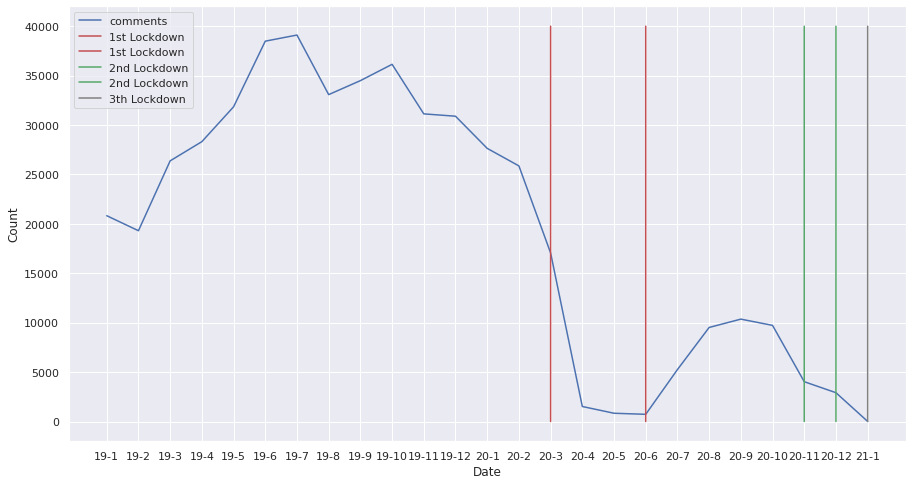

In [25]:
plt.figure(figsize=(15,8))
#plt.title('')
plt.xlabel('Date')
plt.ylabel('Count')
plt.plot(d4['Y-M'],d4.comments,label='comments')

plt.plot(['20-3']*len(range(40000)),range(40000),label='1st Lockdown',c='r')
plt.plot(['20-6']*len(range(40000)),range(40000),label='1st Lockdown',c='r')
plt.plot(['20-11']*len(range(40000)),range(40000),label='2nd Lockdown',c='g')
plt.plot(['20-12']*len(range(40000)),range(40000),label='2nd Lockdown',c='g')
plt.plot(['21-1']*len(range(40000)),range(40000),label='3th Lockdown',c='grey')
plt.legend()

<BarContainer object of 1 artists>

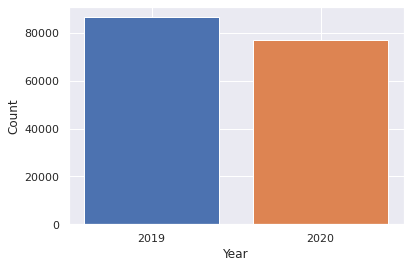

In [30]:
plt.xlabel('Year')
plt.ylabel('Count')
plt.bar('2019',listings19.shape[0])
plt.bar('2020',listings20.shape[0])

In [24]:
m_1

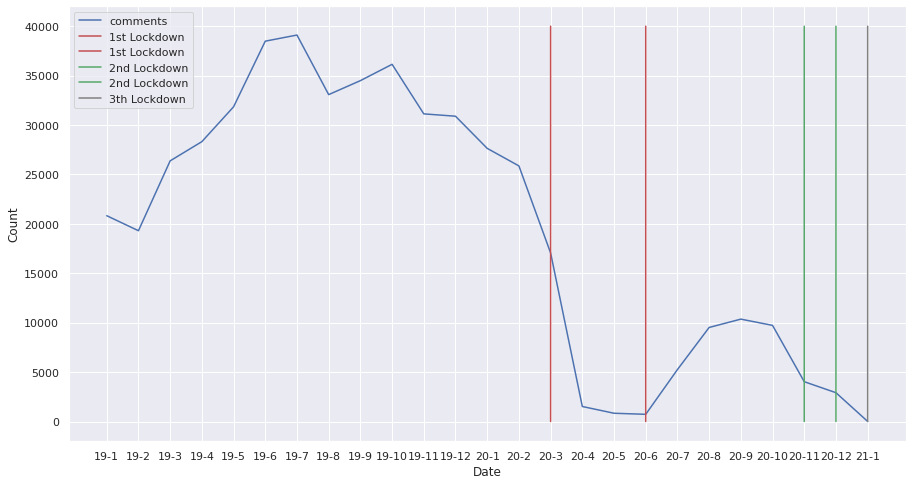

In [28]:
plt.figure(figsize=(15,8))
#plt.title('')
plt.xlabel('Date')
plt.ylabel('Count')
plt.plot(d4['Y-M'],d4.comments,label='comments')
plt.plot(['20-3']*len(range(40000)),range(40000),label='1st Lockdown',c='r')
plt.plot(['20-6']*len(range(40000)),range(40000),label='1st Lockdown',c='r')
plt.plot(['20-11']*len(range(40000)),range(40000),label='2nd Lockdown',c='g')
plt.plot(['20-12']*len(range(40000)),range(40000),label='2nd Lockdown',c='g')
plt.plot(['21-1']*len(range(40000)),range(40000),label='3th Lockdown',c='grey')
plt.legend()

In [29]:
m = folium.Map(location=[latitude, longitude], zoom_start=10, tiles='Stamen Toner')
m.add_child(incidents)
m.add_child(incidents2)